In [4]:
import pandas as pd

data = {
    "CustomerID": range(1, 201),
    "Gender": ["Male" if i % 2 == 0 else "Female" for i in range(1, 201)],
    "Age": [i % 52 + 18 for i in range(1, 201)],
    "Annual Income (k$)": [round((i * 0.85) % 137 + 15, 1) for i in range(1, 201)],
    "Spending Score (1-100)": [(i * 7) % 100 + 1 for i in range(1, 201)],
}

df = pd.DataFrame(data)
df.to_csv("mall_customers.csv", index=False)

print("Dataset Created Successfully!")
df.head()


Dataset Created Successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,19,15.8,8
1,2,Male,20,16.7,15
2,3,Female,21,17.6,22
3,4,Male,22,18.4,29
4,5,Female,23,19.2,36


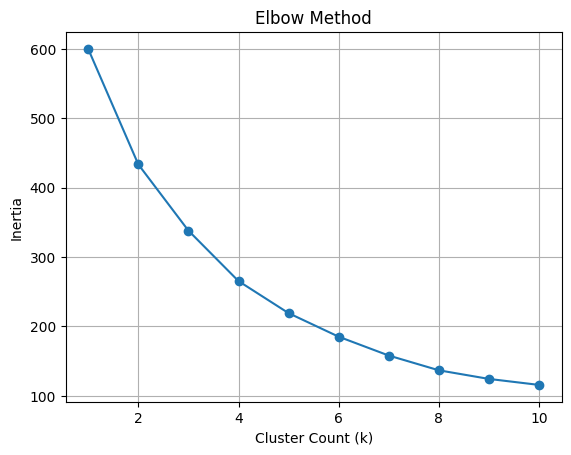

Clustering Completed!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Female,19,15.8,8,4
1,2,Male,20,16.7,15,4
2,3,Female,21,17.6,22,4
3,4,Male,22,18.4,29,4
4,5,Female,23,19.2,36,4


In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Cluster Count (k)")
plt.ylabel("Inertia")
plt.grid()
plt.savefig("elbow_method.png")
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.to_csv("customer_segments.csv", index=False)
print("Clustering Completed!")
df.head()


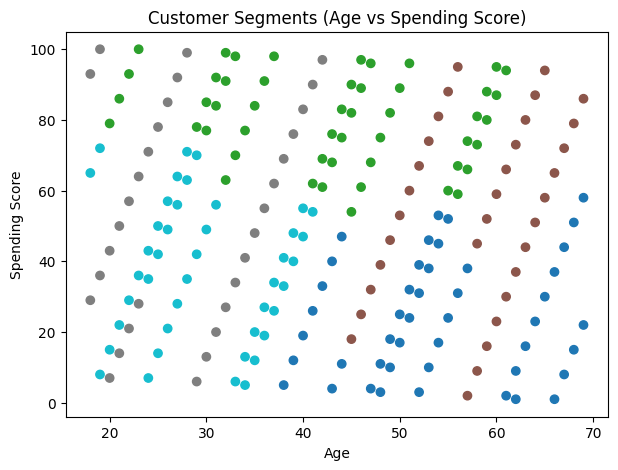

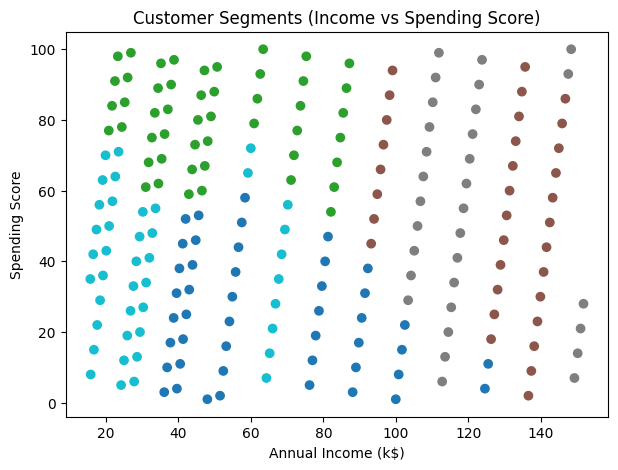

In [6]:
# Graph 1
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='tab10')
plt.title("Customer Segments (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.savefig("clusters_age_spending.png")
plt.show()

# Graph 2
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='tab10')
plt.title("Customer Segments (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.savefig("clusters_income_spending.png")
plt.show()
